# Problem Set 1: Hodrick-Prescott Filter [![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/tobiasraabe/time_series/master?filepath=docs%2Fproblem_sets%2Fproblem_set_1.ipynb)

## Introduction

A commonly used approach to decompose a time series into a permanent component $y^p$ and a transitory (cyclical) component $y^c$ goes back to Hodrick and Prescott (1997). Suppose you have a sequence of data, $y_t$ with $t = 1,...,T$ (i.e. there are $T$ total observations). Our objective is to find a trend $\{y^p_t\}^T_{t=1}$ to minimize the following objective function:

$$
f = \underset{y^p_t}{\min} \sum^T_{t=1} (y_t - y^p_t)^2 + \lambda \sum^{T-1}_{t=2} [(y^p_{t+1} - y^p_t) - (y^p_t - y^p_{t-1})]^2
$$

where the parameter $\lambda \geq 0$.

## Exercise 1

**Question**: Provide a verbal interpretation of this objective function. What are the trade-offs?*

**Answer**: The first term of the function is the sum of quadratic differences between the realization $y_t$ and the trend component $y^p_t$. If the function would only consist of this component, the minimization problem would yield $y^p_t = y_t$. Therefore, $y^p_t$ has also to minimize the squared difference to its neighbours $y^p_{t+1}$ and $y^p_{t-1}$ so that all trend components are similar to each other. The weighting parameter $\lambda$ controls how important it is that the trend values are similar to each other. A higher $\lambda$ will lead to more equal trend components meaning a smoother trend, but it might also wash out important differences in the trend.

## Exercise 2

**Question**: Prove that if $\lambda = 0$, the solution is $y^p_t = y_t \forall t$, i.e. the trend and the actual series are identical.

**Answer**: If $\lambda = 0$ the former minimization problem simplifies to

$$
\underset{y^p_t}{\min} \sum^T_{t=1} (y_t - y^p_t)^2
$$

The first derivative with respect to $y^p_t$ is given by

$$
\begin{align}
\frac{d f}{d y^p_t} &= 2 (y_t - y^p_t)\\
                    &= y_t - y^p_t\\
                    &= 0
\end{align}
$$

## Exercise 3

**Question**: Prove that as $\lambda \to \infty$, the filtered series $\{y^p_t\}^T_{t=1}$ is linear (i.e. $y^p_t = \beta t$ for some $\beta$)

**Answer**: If the formula is divided by $\lambda$ and $\lambda \to \infty$ the first term of the equation approaches 0.

## Exercise 4

**Question**: For the more general case in which $0 < \lambda < \infty$, derive analytical conditions which implicitly define the trend. To do this, take the derivative with respect to $y^p_t$ for each $t = 1, \dots, T$ and set them equal to zero, yielding $T$ first order conditions.

**Answer**: Here are the three different derivations:

For $y^p_1$:
$$
\begin{align}
    - (y_1 - y^p_1) + \lambda (y^p_1 - 2 y^p_2 + y^p_3) &= 0\\
    (1 + \lambda) y^p_1 - 2 \lambda y^p_2 + \lambda y^p_3 &= y_1
\end{align}
$$

For $y^p_2$:
$$
\begin{align}
    - (y_2 - y^p_2) + \lambda [-2(y^p_1 - 2 y^p_2 + y^p_3) + (y^p_2 - 2 y^p_3 + y^p_4)] &= 0\\
    -2 \lambda y^p_1 + (1 - 5\lambda) y^p_2 - 4 \lambda y^p_3 + \lambda y^p_4 &= y_2
\end{align}
$$

For $y^p_t$ for $3 \leq t \leq T-2$:
$$
\begin{align}
    - (y_t - y^p_t) + \lambda [(y^p_t - 2y^p_{t-1} + y^p_{t-2}) - 2(y^p_{t+1} - 2 y^p_t + y^p_{t-1}) + (y^p_{t+2} - 2y^p_{t+1} + y^p_{t}) &= 0\\
    \lambda y^p_{t-2} - 4 \lambda y^p_{t-1} + (1 + 6 \lambda) y^p_t - 4 \lambda y^p_{t+1} + \lambda y^p_{t+2} &= y_t
\end{align}
$$

for $y^p_{T-1}$:
$$
\begin{align}
    - (y_{T-1} - y^p_{T-1})  + \lambda [2(y^p_{T-3} - 2y^p_{T-2} + y^p_{T-1}) - 2(y^p_T - 2y^p_{T-1} + y^p_{T-2})] &= 0\\
    \lambda y^p_{T-3} - 4 \lambda y^p_{T-2} + (1 + 5\lambda) y^p_{T-1} - 2\lambda y^p_T&= y_{T-1}
\end{align}
$$

for $y^p_{T}$:
$$
\begin{align}
    - (y_T - y^p_T)  + \lambda(y^p_T - 2y^p_{T-1} + y^p_{T-2}) &= 0\\
    \lambda y^p_{T-2} - 2\lambda y^p_{T-1} + 2\lambda y^p_T &= y_T
\end{align}
$$

## Exercise 5

**Question**: Write a *Julia* function to find the trend taking the actual data series $y_t$ and parameter $\lambda$ as inputs. To do this, express the first order conditions in Exercise 4 in matrix form as follows:

$$
\begin{align}
\Lambda Y^t &= Y\\
Y^t &= \Lambda^{-1}Y
\end{align}
$$

where $\Lambda$ is a $T \times T$ matrix whose elements are functions of $\lambda$, $Y^t$ is a $T \times 1$ vector equal to $[y^t_1, y^t_2, \dots, y^t_T]'$ and $Y$ is a $T \times 1$ vector equal to $[y_1, y_2, \dots, y_T]'$.

In [1]:
function hodrick_prescott_filter(y, lambda)
    T = size(y, 1)
    matrix = zeros(T, T)
    
    matrix[1, 1:3] = [1 + lambda, -2 * lambda, lambda]
    matrix[2, 1:4] = [-2 * lambda, 1 + 5 * lambda, -4 * lambda, lambda]
    
    for i = 3 : T - 2
        matrix[i, i-2 : i+2] = [lambda, -4*lambda, 1 + 6 * lambda, -4 * lambda, lambda]
    end
    
    matrix[T-1, T-3:T] = [lambda, -4 * lambda, 1 + 5 * lambda, -2 * lambda]
    matrix[T, T-2:T] = [lambda, -2 * lambda, 1 + lambda]
    
    trend = matrix \ y
    cycle = y - trend
    
    return trend, cycle
end;

## Exercise 6

In [2]:
using DataFrames, Plots, SparseArrays, XLSX

In [3]:
y = float.(XLSX.readdata("problem_set_1_data/us_real_gdp.xlsx", "FRED Graph", "B12:B295"));

In [4]:
trend, cycle = hodrick_prescott_filter(y, 1600);

In [5]:
timeline = 1947:0.25:2017.75;

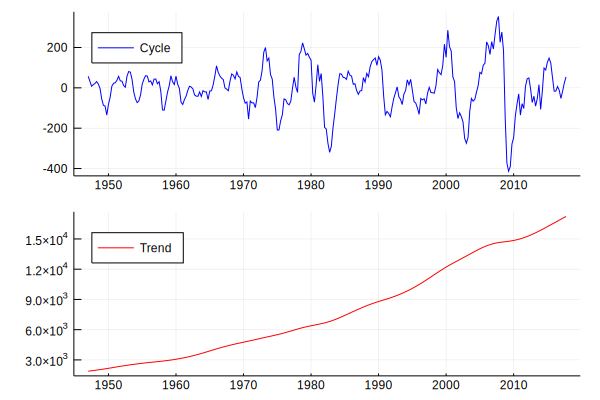

In [13]:
plot(
    plot(timeline, cycle, label="Cycle", color=:blue),
    plot(timeline, trend, label="Trend", color=:red),
    link=:x, layout=(2, 1),
    legend=:topleft,
)

To validate the method, we take another implementation of the HP-Filter from http://www.econforge.org/posts/2014/juil./28/cef2014-julia/ (note the API change introduced by https://github.com/JuliaLang/julia/pull/23757 and the new form explained in https://github.com/JuliaLang/julia/pull/23757/files#diff-7904f4ddd9158030529e0ed5ee8707eeR1771).

In [7]:
function hp_filter(y, lambda)
    n = length(y)
    @assert n >= 4

    diag2 = lambda*ones(n-2)
    diag1 = [ -2lambda; -4lambda*ones(n-3); -2lambda ]
    diag0 = [ 1+lambda; 1+5lambda; (1+6lambda)*ones(n-4); 1+5lambda; 1+lambda ]

    D = spdiagm(-2 => diag2, -1 => diag1, 0 => diag0, 1 => diag1, 2 => diag2)

    trend = D \ y
    cycle = y - trend
    
    return trend, cycle
end;

In [8]:
trend, cycle = hp_filter(y, 1600);

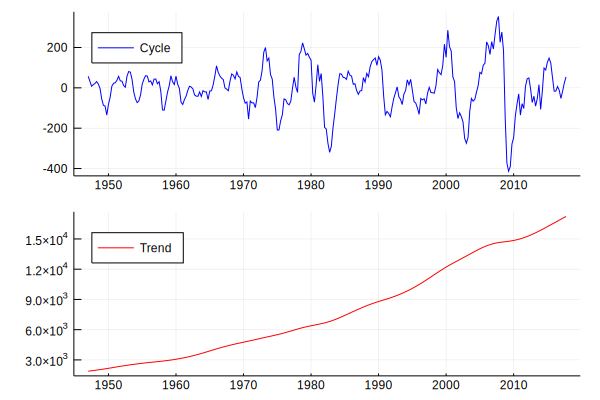

In [9]:
plot(
    plot(timeline, cycle, label="Cycle", color=:blue),
    plot(timeline, trend, label="Trend", color=:red),
    link=:x, layout=(2, 1), legend=:topleft,
)